# Fireflies

## Step 7-8

<IPython.core.display.Javascript object>


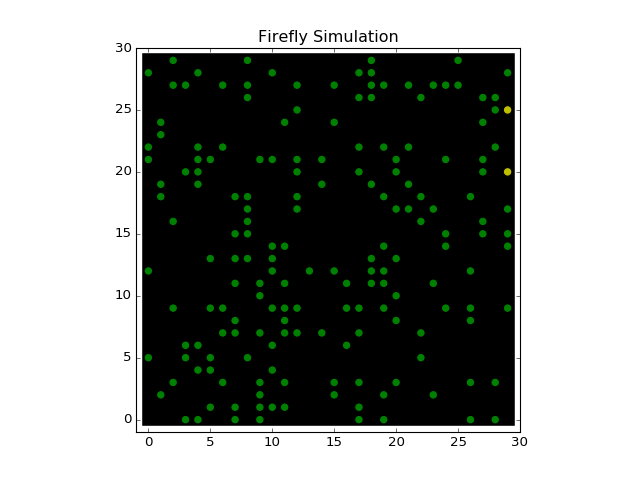

In [2]:
## use mod to determine where it is in its 10 cycle clock

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as cc
from matplotlib.colors import ListedColormap
%matplotlib notebook

FLYCOUNT = 200

colors = cc.ColorConverter.colors
cols = [colors['k']]
tcols = [colors['g'], 
         colors['y']]
ffback = ListedColormap(cols)
ffFly = ListedColormap(tcols)

def von_neuman_neighbors(i, j, size):
    n = []
    if i > 0:
        n.append((i - 1, j))
    if j > 0:
        n.append((i, j - 1))
    if i < size - 1:
        n.append((i + 1, j))
    if j < size - 1:
        n.append((i, j + 1))
    return n

class Agent():
    
    def __init__(self, x, y, world, state):
        self.x = x
        self.y = y
        self.world = world
        self.color = state
        
    def wander(self):
        n = von_neuman_neighbors(self.x, self.y, self.world.size)
        self.x, self.y = random.choice(n)
        
    def update(self):
        pass
    
class Firefly(Agent):
    
    states = {"DARK":0, "FLASH":1}
    
    def __init__(self, x, y, world):
        self.state = Firefly.states["DARK"]
        Agent.__init__(self, x, y, world, self.state)
        self.flash = np.random.randint(0, 10) #number in the 10 tick cycle where the firefly flashes
        self.time = 0 # internal clock
    
        
    def update(self):
        neighbors = von_neuman_neighbors(self.x, self.y, self.world.size)

       
        # or self.time%10 == self.flash + 1
        if self.time % 10 == self.flash:
            self.state = Firefly.states["FLASH"]
        else:
            self.state = Firefly.states["DARK"]
            
        #IF any neighbors are flashing reset to second step of clock. right after a flash.
        
        nFlash = False
        for f in self.world.flies:
            if ((f.x, f.y)) in neighbors and f.state == Firefly.states["FLASH"]:
                nFlash = True
        if nFlash:
            self.time = self.flash + 1
        
        self.time += 1
        
        self.color = self.state
        self.wander()
        
        
class Ground():
    
    states = {"EMPTY":0}
    
    def __init__(self, size):
        self.size = size
        self.x = np.arange(size)
        self.y = np.arange(size)
        self.cells = np.zeros((size, size), dtype="int")
        self.time = 0
        
        self.flies = []
        self.flashing = []
        self.dark = []
        for t in range(FLYCOUNT):
            i, j = np.random.randint(0, size, 2)
            self.flies.append(Firefly(i, j, self))
        
                        
    def image_setup(self):
        plt.title("Firefly Simulation")
        self.plt = plt.imshow(self.cells, interpolation='nearest', 
                            origin='bottom', 
                            vmin=Ground.states["EMPTY"], 
                            cmap=ffback)
        ax = []
        ay = []
        ac = []
        for a in self.flies:
            ax.append(a.x)
            ay.append(a.y)
            ac.append(a.color)
        self.ant_plot = plt.scatter(ax, ay, c=ac, s=60, vmin=Firefly.states["DARK"], 
                                    vmax=Firefly.states["FLASH"], cmap=ffFly)
        
        
        
    def update(self):
        tempFlash = 0
        for f in self.flies:
            f.update()
            if f.state == Firefly.states["FLASH"]:
                tempFlash += 1
        self.time += 1
        self.flashing.append(tempFlash)
        self.dark.append(FLYCOUNT - tempFlash)
        
    def plot(self):
        self.plt.set_data(np.transpose(self.cells))
        ap = []
        ac = []
        for a in self.flies:
            ap.append((a.x, a.y))
            ac.append(a.color)
            
        self.ant_plot.set_offsets(ap)
        ac = np.array(ac)
        self.ant_plot.set_array(ac)
        if self.time == 1000:
            print(self.time)
            ani.event_source.stop()

        return self.plt, self.ant_plot
    
    
size = 30

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

g = Ground(size)
g.image_setup()

def update(data):
    g.update()
    return g.plot(), 

def data_gen():
    while True: yield 1

ani = animation.FuncAnimation(fig, update, data_gen, blit=False, interval=40)
plt.show()

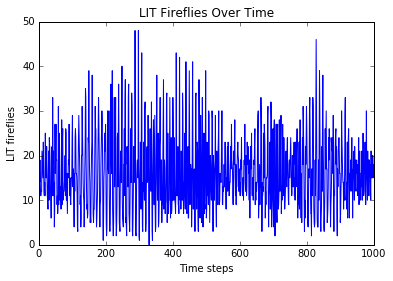

In [19]:
%matplotlib inline
g1f = Ground(size)

time = 0
while time < 1000:
    g1f.update()
    time += 1 
    
flashes = g1f.flashing
plt.xlabel("Time steps")
plt.ylabel("LIT fireflies")
plt.title("LIT Fireflies Over Time")
plt.plot(np.linspace(0, time-1, time), flashes)


The average seems to hover around 20 fireflies lit up per timestep. One conclusion I can make from seeing the results and watching the animation is that when there are just two neighbor fireflies they will flash almost 10 timesteps after eachother each time, because their time is being put one after their flash step, so they will be one step ahead of the other neighbor. When the second flash happens, the neighbor that was one step from flashing is suddenly reset to one after its step. This continues so that the two may never match up if there is no other input to their flashes. This idea is really similar to the Game of Life that we discussed in class.

From the graph above you can see that there are masive changes in the numbers for each time step. The number of lit up fireflies seems to bounce up and down each time step. This kinda shows that the fireflies alternate with their neighbors, so when they light up, in a few time steps their neighbors will and so on. This is why the amount of lit fireflies bounces so much between higher and lower values. 


## Step 9

<IPython.core.display.Javascript object>


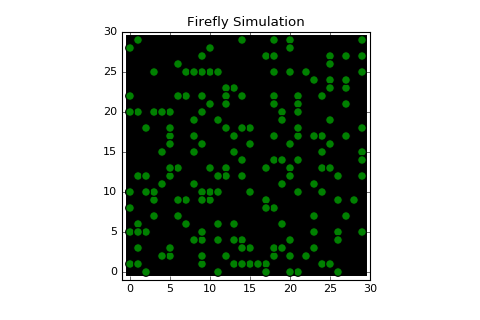

In [22]:
%matplotlib notebook

FLYCOUNT = 200

colors = cc.ColorConverter.colors
cols = [colors['k']]
tcols = [colors['g'], 
         colors['y']]
ffback = ListedColormap(cols)
ffFly = ListedColormap(tcols)

def von_neuman_neighbors(i, j, size):
    n = []
    if i > 0:
        n.append((i - 1, j))
    if j > 0:
        n.append((i, j - 1))
    if i < size - 1:
        n.append((i + 1, j))
    if j < size - 1:
        n.append((i, j + 1))
    return n

class Agent():
    
    def __init__(self, x, y, world, state):
        self.x = x
        self.y = y
        self.world = world
        self.color = state
        
    def wander(self):
        n = von_neuman_neighbors(self.x, self.y, self.world.size)
        self.x, self.y = random.choice(n)
        
    def update(self):
        pass
    
class Firefly2(Agent):
    
    states = {"DARK":0, "FLASH":1}
    
    def __init__(self, x, y, world):
        self.state = Firefly.states["DARK"]
        Agent.__init__(self, x, y, world, self.state)
        self.flash = np.random.randint(0, 10)
        self.time = 0
    
        
    def update(self):
        neighbors = von_neuman_neighbors(self.x, self.y, self.world.size)
       
        # or self.time%10 == self.flash + 1
        if self.time % 10 == self.flash or self.time % 10 == (self.flash + 1) % 10:
            self.state = Firefly.states["FLASH"]
        else:
            self.state = Firefly.states["DARK"]
            
        #IF any neighbors are flashing reset to second step of clock. right after a flash.
        
        nFlash = False
        for f in self.world.flies:
            if ((f.x, f.y)) in neighbors and f.state == Firefly.states["FLASH"]:
                nFlash = True
        if nFlash:
            self.time = self.flash + 1
        
        self.time += 1
        
        self.color = self.state
        self.wander()
        
        
class Ground2():
    
    states = {"EMPTY":0}
    
    def __init__(self, size):
        self.size = size
        self.x = np.arange(size)
        self.y = np.arange(size)
        self.cells = np.zeros((size, size), dtype="int")
        self.time = 0
        
        self.flies = []
        self.flashing = []
        self.dark = []
        for t in range(FLYCOUNT):
            i, j = np.random.randint(0, size, 2)
            self.flies.append(Firefly2(i, j, self))
        
                        
    def image_setup(self):
        plt.title("Firefly Simulation")
        self.plt = plt.imshow(self.cells, interpolation='nearest', 
                            origin='bottom', 
                            vmin=Ground.states["EMPTY"], 
                            cmap=ffback)
        ax = []
        ay = []
        ac = []
        for a in self.flies:
            ax.append(a.x)
            ay.append(a.y)
            ac.append(a.color)
        self.ant_plot = plt.scatter(ax, ay, c=ac, s=60, vmin=Firefly.states["DARK"], 
                                    vmax=Firefly.states["FLASH"], cmap=ffFly)
        
        
        
    def update(self):
        tempFlash = 0
        for f in self.flies:
            f.update()
            if f.state == Firefly.states["FLASH"]:
                tempFlash += 1
        self.time += 1
        self.flashing.append(tempFlash)
        self.dark.append(FLYCOUNT - tempFlash)
        
    def plot(self):
        self.plt.set_data(np.transpose(self.cells))
        ap = []
        ac = []
        for a in self.flies:
            ap.append((a.x, a.y))
            ac.append(a.color)
            
        self.ant_plot.set_offsets(ap)
        ac = np.array(ac)
        self.ant_plot.set_array(ac)
        if self.time == 1000:
            print(self.time)
            ani.event_source.stop()

        return self.plt, self.ant_plot
    
    
size = 30

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

g = Ground(size)
g.image_setup()

def update(data):
    g.update()
    return g.plot(), 

def data_gen():
    while True: yield 1

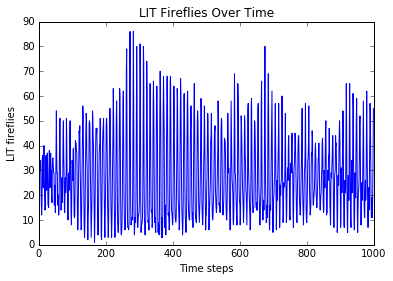

In [23]:
%matplotlib inline
g2f = Ground2(size)

time = 0
while time < 1000:
    g2f.update()
    time += 1 
    
flashes2 = g2f.flashing
plt.xlabel("Time steps")
plt.ylabel("LIT fireflies")
plt.title("LIT Fireflies Over Time")
plt.plot(np.linspace(0, time-1, time), flashes2)



The biggest difference in these graphs is the range and spread of them. When the flash only lasts for 1 step, the number of lit fireflies is just under 20. When the flash length is at 2 time steps, the number of seemed to hover around 25 or 30, but the range went all the way to near 90 fireflies flashing at once. 

So the fireflies litness isn't as clustered in the middle as with just one time step flash, instead the amount of lit fireflies bounces still, but with a much larger range than previous. This model yields a higher average, it seems, than the 1 flash model.  

In both models, as described in the Synchronous Fireflies link, the graphs seem to reach a peak in thier number of flashes, which then begins to decline. This is exactly what was described by the article. This peak in the first graph seems to occur around 300 days, which is the same for the second graph.